# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from geomloss import SamplesLoss
import NCA.utils as utils
from NCA.NCA import *
from NCA.utils import  natural_keys
import csv
import os

### Whether Graphs Have a Normal Scale or Log Scale 

In [2]:
NORMAL = False

# Graph for Final Training Loss Compared to Masking Level

DummyVCA_padding_0_data.npy
DummyVCA_padding_1_data.npy
DummyVCA_padding_2_data.npy
DummyVCA_padding_3_data.npy
DummyVCA_padding_4_data.npy
DummyVCA_padding_5_data.npy
DummyVCA_padding_6_data.npy
DummyVCA_padding_7_data.npy
DummyVCA_padding_8_data.npy
DummyVCA_padding_9_data.npy
DummyVCA_padding_10_data.npy
DummyVCA_padding_11_data.npy
DummyVCA_padding_12_data.npy
ReducedCA_padding_0_data.npy
ReducedCA_padding_1_data.npy
ReducedCA_padding_2_data.npy
ReducedCA_padding_3_data.npy
ReducedCA_padding_4_data.npy
ReducedCA_padding_5_data.npy
ReducedCA_padding_6_data.npy
ReducedCA_padding_7_data.npy
ReducedCA_padding_8_data.npy
ReducedCA_padding_9_data.npy
ReducedCA_padding_10_data.npy
ReducedCA_padding_11_data.npy
ReducedCA_padding_12_data.npy
MaskedCA_padding_0_data.npy
MaskedCA_padding_1_data.npy
MaskedCA_padding_2_data.npy
MaskedCA_padding_3_data.npy
MaskedCA_padding_4_data.npy
MaskedCA_padding_5_data.npy
MaskedCA_padding_6_data.npy
MaskedCA_padding_7_data.npy
MaskedCA_padding_8_data.npy
M

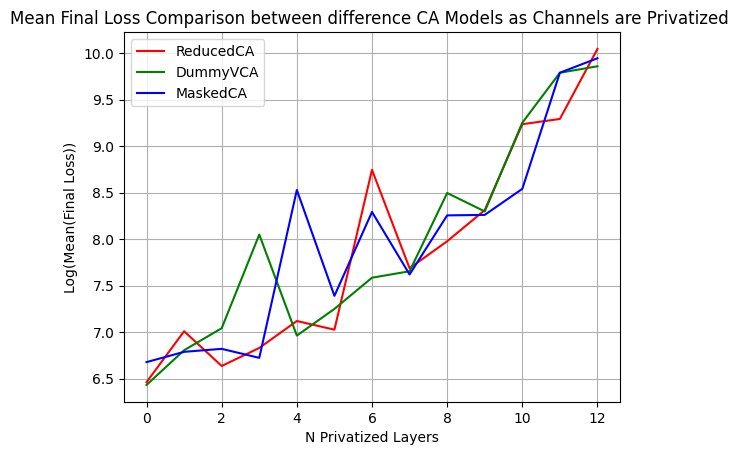

In [3]:
path = "Saved_Data/Lizard"  #<--- Make sure its correct
final_log = []
regrowth_log = []
# plt the min loss for each model compared to masking
x_axis = [0,1,2,3,4,5,6,7,8,9,10,11,12]
colors = ["r", "g", "b"]
ncas = ["ReducedCA", "DummyVCA", "MaskedCA"]
plt.figure(4)

for id, (root, subdirs, files) in enumerate(os.walk(path, topdown=True)):
    means = []
    stds=[]
    if len(files) != 0:
        files.sort(key=natural_keys)
        for idx, file in enumerate(files):
            data = np.load(root+ "/" +file)
            if NORMAL:
                data1 = np.mean(np.exp(np.min(data)))/ 50**2
            else:
                data1 = np.min(data)
            data2 = np.std(data[-1:])
            print(file)
            means.append(data1)
            stds.append(data2)
        means = np.asarray(means)
        final_log.append(means)
        stds = np.asarray(stds)
        plt.plot(x_axis, means, color = colors[id-1], label=ncas[id-1])
        plt.title("Mean Final Loss Comparison between difference CA Models as Channels are Privatized ")
        plt.ylabel('Log(Mean(Final Loss))')
        plt.xlabel('N Privatized Layers')
        plt.legend()
        plt.grid(True)

    # Graph for Mean Regrowth Loss Compared to Masking Level

LizardReducedCA.npy
LizardMaskedCA.npy
LizardDummyVCA.npy


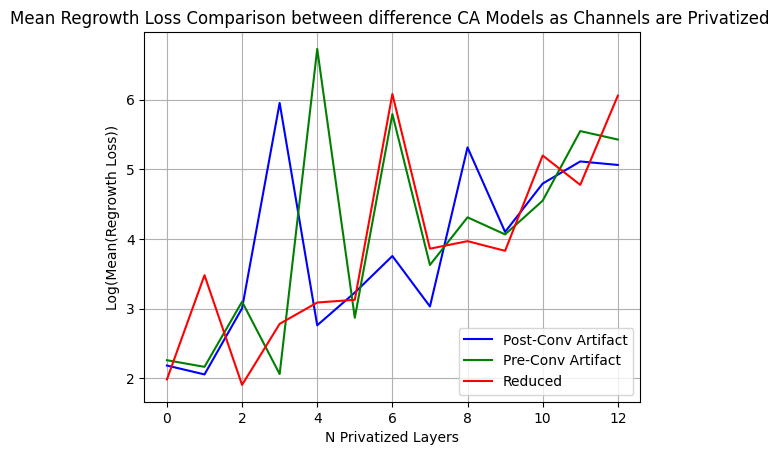

In [4]:
path = "Regrow_exp_data/Lizard"
x_axis = [0,1,2,3,4,5,6,7,8,9,10,11,12]
colors = ["b", "g", "r"]
ncas = [ "Post-Conv Artifact", "Pre-Conv Artifact", "Reduced"]
plt.figure(3)
for id, (root, subdirs, files) in enumerate(os.walk(path, topdown=True)):
    if len(files) != 0:
        for idx, file in enumerate(files):
            data = np.load(root+ "/" +file)
            if NORMAL:
                data1 = np.exp(np.mean(data, axis=1))/ 50**2
            else:
                data1 = np.mean(data, axis=1)
            data2 = np.std(data, axis=1)
            regrowth_log.insert(0, data1)
            print(file)
            plt.plot(x_axis, data1, color = colors[idx], label=ncas[idx])
            plt.title("Mean Regrowth Loss Comparison between difference CA Models as Channels are Privatized ")
            plt.ylabel('Log(Mean(Regrowth Loss))')
            plt.xlabel('N Privatized Layers')
            plt.legend()
            plt.grid(True)



# Produces the CSV Comparing NCA through Gram Loss 

In [17]:
path_masked = "Trained_models/Lizard/MaskedCA" #<--- first set of models to compare
path_dummy = "Trained_models/Lizard/MaskedCA" #<--- second set of models to compare, can be same
dummy_files = os.listdir(path_dummy)
masked_files = os.listdir(path_masked)
masked_files.sort(key=natural_keys)
dummy_files.sort(key=natural_keys)
mat = []
loss_fn = SamplesLoss("sinkhorn", p=2, blur=0.005)
for df in dummy_files:
    df = path_dummy + "/" + df
    nca1 = DummyVCA(16, 96, 0)
    nca1.load_state_dict(torch.load(df))
    nca1.cuda().eval()
    sum_losses = []
    for mf in masked_files:
        mf = path_masked + "/" + mf
        nca2 = DummyVCA(16,96,0)
        nca2.load_state_dict(torch.load(mf))
        nca2.cuda().eval()
        loss = 0
        for (name1,param1), (name2,param2) in zip(nca1.named_parameters(), nca2.named_parameters()):
            if len(param1.shape) >1:
                loss = loss + torch.nn.functional.mse_loss(utils.gram_matrix(param1.data), utils.gram_matrix(param2.data)).item()

        sum_losses.append(loss)
    mat.append(sum_losses)

/tmp/ipykernel_1682296/2645322199.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nca1.load_state_dict(torch.load(df))
/tmp/ipykernel_1682296/2645322199.py:18: FutureWa

# Creates the Path and Saves CSV

In [ ]:
csv_path = "CSVs"
if not os.path.exists(csv_path):
    os.makedirs(csv_path)
    print(f"Path: {csv_path} created")
else: 
    print(f"Path: {csv_path} already exists, all OK!")
    
    
file_path = "/inter_image_gram.csv" #<--- name of csv 
with open(csv_path+file_path, "w+") as my_csv:
    csvWriter = csv.writer(my_csv, delimiter=',')
    csvWriter.writerows(mat)

# Pearson Correlation Coef Between Regrowth Loss and Training Loss 

In [ ]:
for final_l, regrowth_log in zip(final_log, regrowth_log):
    print(np.corrcoef(final_l, regrowth_log))